In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('../../data/final_data_200.csv')

In [57]:
df

,user,date,user_week,pos,rank
0,0.0,2014-01-06 00:00:00,u00_w02,"(143, 144)",1
1,0.0,2014-01-06 18:00:00,u00_w02,"(143, 144)",1
2,0.0,2014-01-07 17:00:00,u00_w02,"(143, 144)",1
3,0.0,2014-01-08 16:30:00,u00_w02,"(143, 144)",1
4,0.0,2014-01-09 17:00:00,u00_w02,"(143, 144)",1
...,...,...,...,...,...
244687,99.0,2014-06-07 20:30:00,u99_w23,"(136, 139)",46
244688,99.0,2014-06-07 22:30:00,u99_w23,"(120, 135)",46
244689,99.0,2014-06-18 15:00:00,u99_w25,"(135, 138)",46
244690,99.0,2014-06-19 15:00:00,u99_w25,"(122, 136)",46


In [41]:
import sys
sys.path.insert(0, '../')
import mobility_entropy as me
from importlib import reload
reload(me)

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate entropies
random_entropy = me.calculate_random_entropy(df)
temporal_uncorrelated_entropy = me.calculate_temporal_uncorrelated_entropy(df)
# actual_entropy = me.calculate_actual_entropy(df)
lempel_ziv_entropy = me.calculate_lempel_ziv_entropy(df)
# calculate number of unique locations for every user
unique_locations = df.groupby('user').pos.nunique()



# Convert to DataFrame for plotting
entropy_df = pd.DataFrame({
    'user': list(random_entropy.keys()),
    'random_entropy': list(random_entropy.values()),
    'temporal_uncorrelated_entropy': list(temporal_uncorrelated_entropy.values()),
    # 'actual_entropy': list(actual_entropy.values()),
    'zempel_ziv_entropy': list(lempel_ziv_entropy),
    'no_unique_locations': list(unique_locations)
})


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

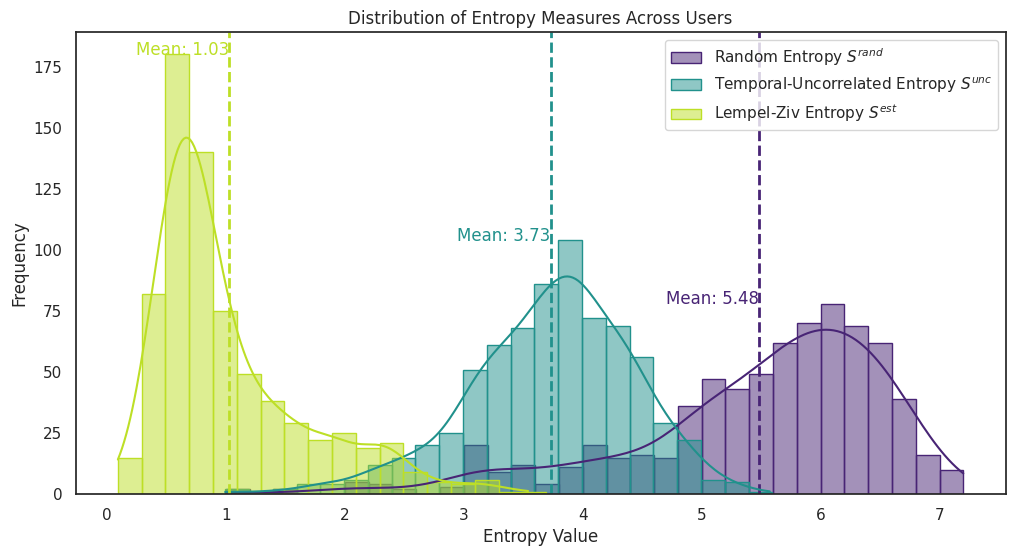

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming entropy_df is your DataFrame and it's already defined

# Get the 'crest' colormap
crest_cmap = sns.color_palette("viridis", as_cmap=True)

# Define a bin width
bin_width = 0.2  # Adjust this value as needed

# Plotting
plt.figure(figsize=(12, 6))
sns.set(style="white")

# Plot and add a vertical line for the mean for Random Entropy
mean_random_entropy = entropy_df['random_entropy'].mean()
sns.histplot(entropy_df['random_entropy'], color=crest_cmap(0.1), label='Random Entropy $S^{rand}$', kde=True, edgecolor=crest_cmap(0.1), binwidth=bin_width)
plt.axvline(mean_random_entropy, color=crest_cmap(0.1), linestyle='dashed', linewidth=2)
plt.text(mean_random_entropy, plt.ylim()[1]*0.95, f'Mean: {mean_random_entropy:.2f}', color=crest_cmap(0.1), ha='right')

# Plot and add a vertical line for the mean for Temporal-Uncorrelated Entropy
mean_temporal_uncorrelated_entropy = entropy_df['temporal_uncorrelated_entropy'].mean()
sns.histplot(entropy_df['temporal_uncorrelated_entropy'], color=crest_cmap(0.5), label='Temporal-Uncorrelated Entropy $S^{unc}$', kde=True, edgecolor=crest_cmap(0.5), binwidth=bin_width)
plt.axvline(mean_temporal_uncorrelated_entropy, color=crest_cmap(0.5), linestyle='dashed', linewidth=2)
plt.text(mean_temporal_uncorrelated_entropy, plt.ylim()[1]*0.95, f'Mean: {mean_temporal_uncorrelated_entropy:.2f}', color=crest_cmap(0.5), ha='right')

# Plot and add a vertical line for the mean for Lempel-Ziv Entropy
mean_zempel_ziv_entropy = entropy_df['zempel_ziv_entropy'].mean()
sns.histplot(entropy_df['zempel_ziv_entropy'], color=crest_cmap(0.9), label='Lempel-Ziv Entropy $S^{est}$', kde=True, edgecolor=crest_cmap(0.9), binwidth=bin_width)
plt.axvline(mean_zempel_ziv_entropy, color=crest_cmap(0.9), linestyle='dashed', linewidth=2)
plt.text(mean_zempel_ziv_entropy, plt.ylim()[1]*0.95, f'Mean: {mean_zempel_ziv_entropy:.2f}', color=crest_cmap(0.9), ha='right')

plt.title('Distribution of Entropy Measures Across Users')
plt.xlabel('Entropy Value')
plt.ylabel('Frequency')
plt.legend()

# Save the figure
plt.savefig('../../figures/entropy_distribution.png', dpi=300)

plt.show()


## Upper boundary for predictability 

In [48]:
# example 
root = me.calculate_predictability(N=20, S_i=2)
root


0.727956983388864

In [49]:
# calculate predictability for every user based on zempel_ziv_entropy and no_unique_locations
predictability = []
for i in range(len(entropy_df)):
    predictability.append(me.calculate_predictability(N=entropy_df['no_unique_locations'][i], S_i=entropy_df['zempel_ziv_entropy'][i]))
    
    

In [50]:
entropy_df['predictability'] = predictability

In [55]:
# remove entries with predictability 0
entropy_df = entropy_df[entropy_df['predictability'] != 0]


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


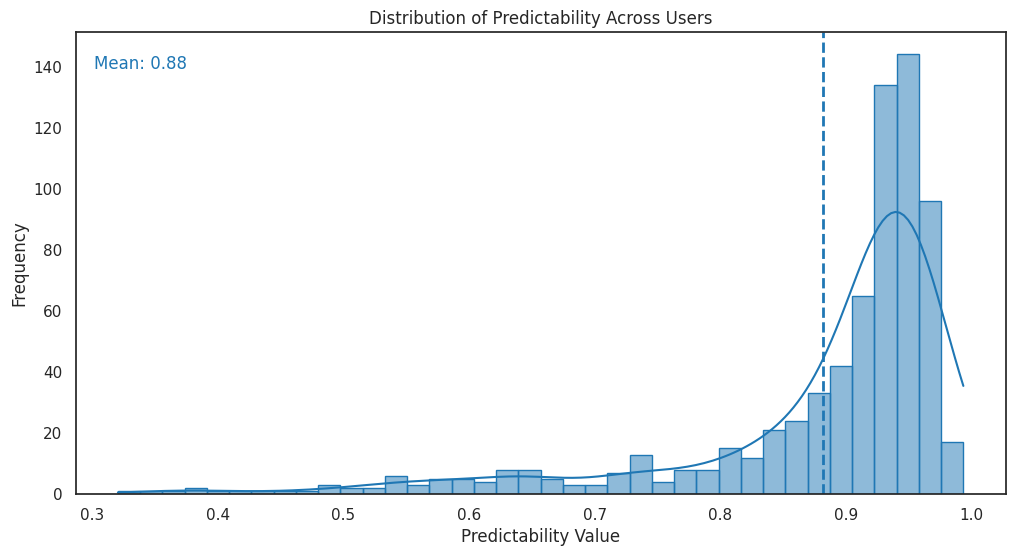

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of predictability
plt.figure(figsize=(12, 6))

sns.histplot(entropy_df['predictability'], color='#1f77b4', label='Predictability', kde=True, edgecolor ='#1f77b4')

# Add vertical lines for mean
mean_value = entropy_df['predictability'].mean()
plt.axvline(mean_value, color='#1f77b4', linestyle='dashed', linewidth=2.)

# Add mean value as text at the top of the plot
plt.text(0.02, 0.95, 'Mean: {:.2f}'.format(mean_value), transform=plt.gca().transAxes, color="#1f77b4", verticalalignment='top')

plt.title('Distribution of Predictability Across Users')
plt.xlabel('Predictability Value')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('../../figures/predictability_distribution.png', dpi=300)

plt.show()
